In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

### 1. Exploring and Understanding Data


#### 1.1 Viewing the data

In [3]:
df = pd.read_csv("Leads.csv")

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df.shape

(9240, 37)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Cehcking the statistical aspects
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Checking the null values

In [8]:
# Null values 
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
#Percentage of null values in each column
df.isnull().sum()/len(df) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [10]:
# Dropping columns with more than 30% null values
droppedcols=[]
for col in df.columns:
    if df[col].isnull().sum()/len(df)*100 > 30:
        df.drop(col, axis=1, inplace = True)
        droppedcols.append(col)
droppedcols    

['Tags',
 'Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [11]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
df['Country'].value_counts(dropna = False)/len(df) * 100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

In [13]:
# Dropping the column country as 26% are null values and 70% is India. The number of leads from countries other than India is quite low.
# So focusing on their conversion rates is  not going to help the company much.
# Hence dropping this column

df.drop('Country', axis = 1, inplace = True)

Removing columns Prospect ID and Lead number

In [14]:
# These columns doesnt contribute to prediction as these are unique values assigned to each lead
df.drop(columns=['Prospect ID', 'Lead Number'], inplace = True)

####  Missing value imputation

In [15]:
# Check the number of null values again

df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [16]:
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [17]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [18]:
#Clearly the levels Lead Profile and How did you hear about X Education have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them.
df.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [19]:
# Checking the column lead source

df['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [20]:
# Cleaning and replacing the necessary values

df['Lead Source'] = df['Lead Source'].replace('google', 'Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook', 'Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing', 'Click2call', 'Press_Release', 'Live Chat', 'youtubechannel', 'testone', 'Pay per Click Ads', 
                 'welearnblog_Home', 'WeLearn', 'blog', 'NC_EDM'], 'Others')

In [21]:
df['Lead Source'].value_counts(dropna = False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
NaN                   36
Others                21
Name: Lead Source, dtype: int64

In [22]:
# Drop the null values rows in the column 'Lead Source'

df = df[~pd.isnull(df['Lead Source'])]

In [23]:
df['Lead Source'].value_counts(dropna = False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                21
Name: Lead Source, dtype: int64

In [24]:
df['Specialization'].value_counts(dropna = False)

Select                               1914
NaN                                  1438
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
df['Specialization'] = df['Specialization'].replace(['Finance Management', 'Human Resource Management', 'Marketing Management', 
                                                     'Operations Management', 'IT Projects Management', 'Supply Chain Management', 
                                                     'Healthcare Management', 'Hospitality Management', 'Retail Management'], 'Management')


In [26]:
df['Specialization'].value_counts(dropna = False)

Management                           4246
Select                               1914
NaN                                  1438
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            111
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [27]:
df['What is your current occupation'].value_counts(dropna = False)

Unemployed              5567
NaN                     2690
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
# Dropping null rows
df = df[~pd.isnull(df['What is your current occupation'])]

In [29]:
df['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6492
NaN                            19
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [30]:
df.shape

(6514, 26)

In [31]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'
df = df[~pd.isnull(df['What matters most to you in choosing a course'])]

In [32]:
df.shape

(6495, 26)

In [33]:
df.isnull().sum()

Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      123
Total Time Spent on Website                        0
Page Views Per Visit                             123
Last Activity                                    101
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                              0
Through Recommendations                       

In [34]:
df['City'].value_counts(dropna = False)

Mumbai                         2476
Select                         2218
Thane & Outskirts               590
Other Cities                    522
Other Cities of Maharashtra     346
Other Metro Cities              290
Tier II Cities                   53
Name: City, dtype: int64

In [35]:
df['City'] = df['City'].replace(np.nan, 'Not mentioned')

In [37]:
df['TotalVisits'].isnull().sum()

123

In [38]:
# Drop the null value rows in the column 'TotalVisits'
df = df[~pd.isnull(df['TotalVisits'])]

In [39]:
df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our 

In [40]:
df['Last Activity'].value_counts()

Email Opened                    2455
SMS Sent                        2189
Olark Chat Conversation          428
Page Visited on Website          426
Converted to Lead                292
Email Link Clicked               178
Email Bounced                    175
Form Submitted on Website         81
Unreachable                       71
Unsubscribed                      40
Had a Phone Conversation          23
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [41]:
# Putting those with few counts into "other"


df['Last Activity'] = df['Last Activity'].replace(['Approached upfront', 'View in browser link Clicked', 'Email Received', 
                                                   'Email Marked Spam', 'Visited Booth in Tradeshow', 'Resubscribed to emails'], "Others")

In [42]:
df['Last Notable Activity'].value_counts()

Email Opened                    2038
Modified                        1947
SMS Sent                        1869
Page Visited on Website          212
Email Link Clicked               110
Olark Chat Conversation           76
Email Bounced                     49
Unsubscribed                      31
Unreachable                       22
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [43]:
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation', 'Email Marked Spam', 
                                                                   'Approached upfront', 'Resubscribed to emails', 
                                                                   'View in browser link Clicked', 'Form Submitted on Website', 
                                                                   'Email Received'], 'Others')

### Bivariate Analysis

In [44]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,No,No,No,No,No,No,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,No,No,No,No,No,No,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,No,No,No,No,No,No,Mumbai,No,No,Modified


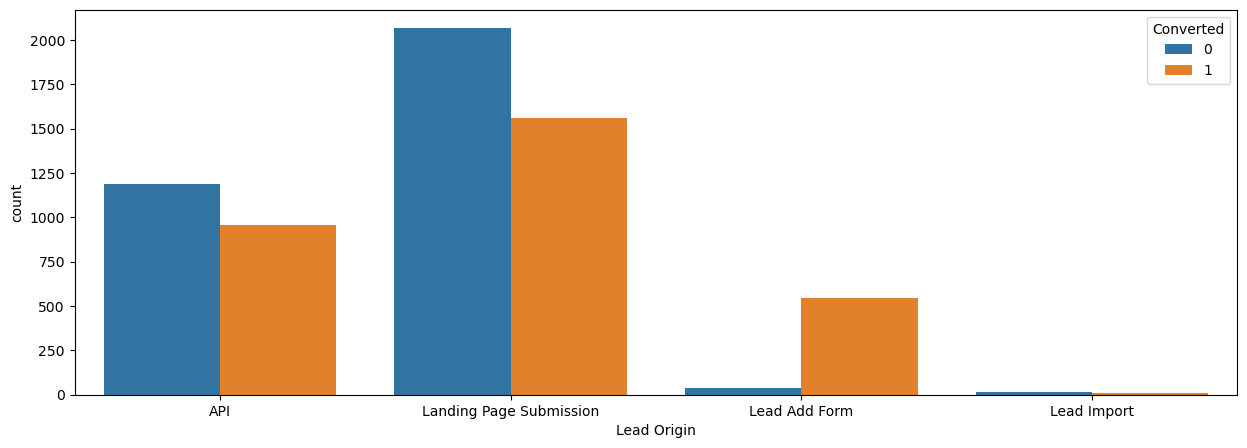

In [45]:
plt.figure(figsize = (15,5))
sns.countplot(x = df['Lead Origin'], hue = df['Converted'])
plt.show()

In [46]:
df['Lead Origin'].value_counts(normalize = True) * 100

Landing Page Submission    56.873823
API                        33.584432
Lead Add Form               9.118016
Lead Import                 0.423729
Name: Lead Origin, dtype: float64

1. The number of leads coming through Landing page submission and API is high but their conversion rate is not good enough. It can be improved.
2. Conversion rate of Leas Add Form is good, hence the sales team can focus more on that lead origin to improve sales.


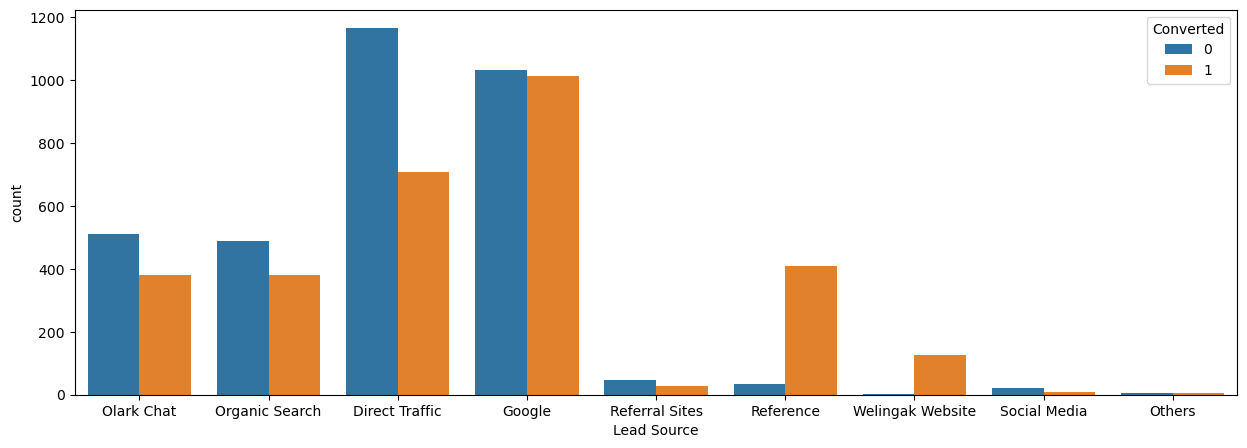

In [47]:
plt.figure(figsize = (15,5))
sns.countplot(x = df['Lead Source'], hue = df['Converted'])
plt.show()

# we can see that most conversions are from Google and direct traffic
# Also for Reference and Welingak Website converted percentage is more than not being converted

We can see that most conversions are from Google and direct traffic. 
Also for Reference and Welingak Website, converted percentage is more than not being converted.

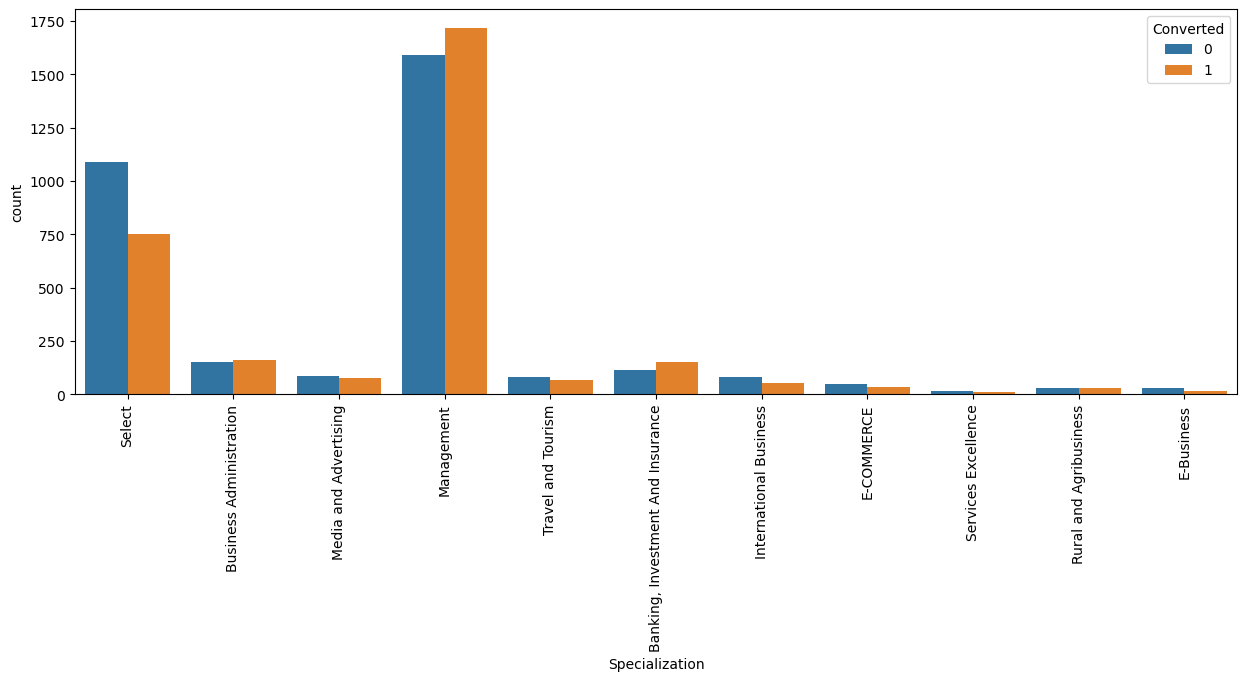

In [48]:
plt.figure(figsize = (15,5))
sns.countplot(x = df['Specialization'], hue = df['Converted'])
plt.xticks(rotation=90)
plt.show()



People from management background have opted for the course more than any other specialization and the coversion rate is also high.
Conversion rate is also high in Banking, Investment And Insurance

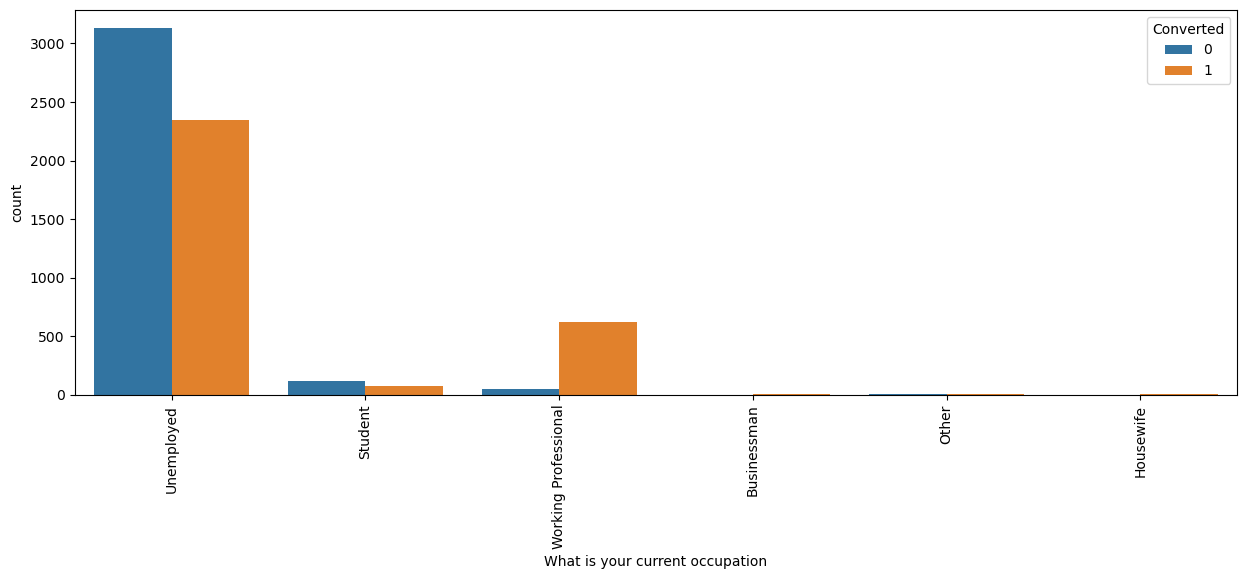

In [49]:
plt.figure(figsize = (15,5))
sns.countplot(x = df['What is your current occupation'], hue = df['Converted'])
plt.xticks(rotation=90)
plt.show()


Unemployed poeple opt for the courses more than any other category. Convertion rate is also high. 
conversion rate among working professional is higher than not converting

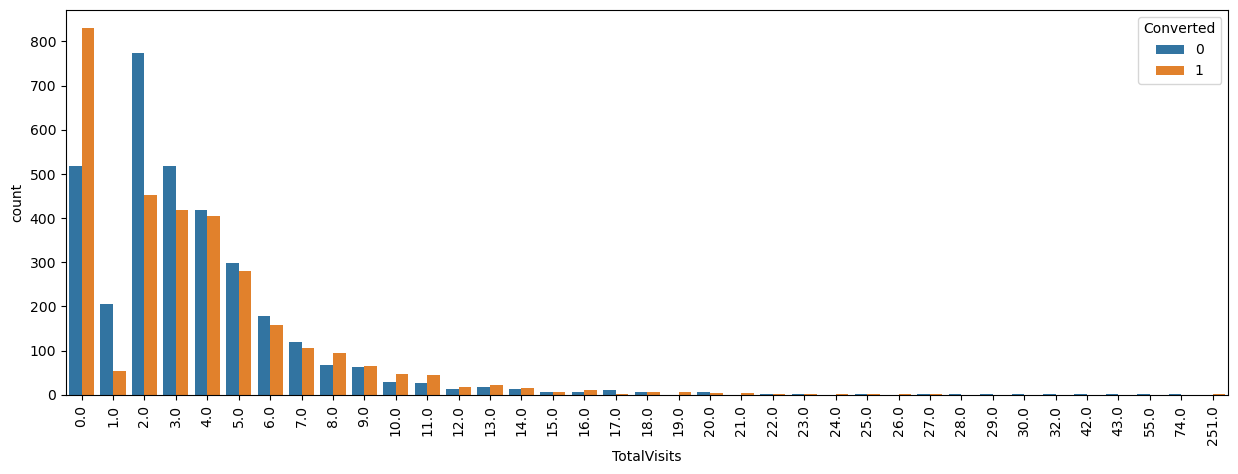

In [50]:
plt.figure(figsize = (15,5))
sns.countplot(x = df['TotalVisits'], hue = df['Converted'])
plt.xticks(rotation=90)
plt.show()

Checking the columns representing whether the customer had seen the ad in any of the listed items

In [51]:
adlist = ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement']

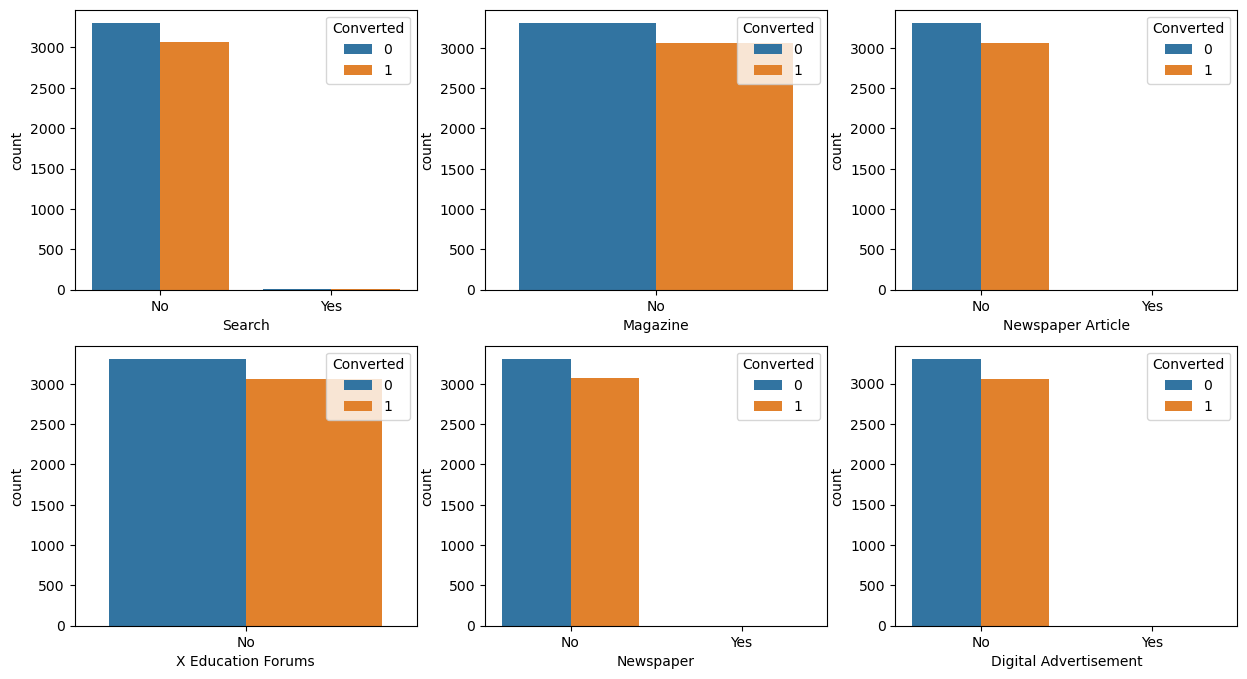

In [52]:
adlist = ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement']
plt.figure(figsize = (15,8))
for i in range(len(adlist)):
    plt.subplot(2,3,i+1)
    sns.countplot(x=df[adlist[i]], hue = df['Converted'])

In [53]:
for i in range(len(adlist)):
    print(adlist[i])
    print(df[adlist[i]].value_counts(normalize = True) * 100, end="\n\n")

Search
No     99.843063
Yes     0.156937
Name: Search, dtype: float64

Magazine
No    100.0
Name: Magazine, dtype: float64

Newspaper Article
No     99.984306
Yes     0.015694
Name: Newspaper Article, dtype: float64

X Education Forums
No    100.0
Name: X Education Forums, dtype: float64

Newspaper
No     99.984306
Yes     0.015694
Name: Newspaper, dtype: float64

Digital Advertisement
No     99.952919
Yes     0.047081
Name: Digital Advertisement, dtype: float64



We can see that most columns contains a constant value. Features without much variance or variability in the data do not provide any information to an ML model for learning the patterns. Dropping these columns as they dont have much variability.

In [54]:
df.drop(columns = ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement'], inplace = True)

In [55]:
for i in df.columns:
    print(i)
    print(df[i].value_counts(normalize = True) * 100, end="\n\n")

Lead Origin
Landing Page Submission    56.873823
API                        33.584432
Lead Add Form               9.118016
Lead Import                 0.423729
Name: Lead Origin, dtype: float64

Lead Source
Google              32.140615
Direct Traffic      29.394225
Olark Chat          13.998745
Organic Search      13.653484
Reference            6.952291
Welingak Website     2.024482
Referral Sites       1.161331
Social Media         0.470810
Others               0.204018
Name: Lead Source, dtype: float64

Do Not Email
No     93.188952
Yes     6.811048
Name: Do Not Email, dtype: float64

Do Not Call
No     99.968613
Yes     0.031387
Name: Do Not Call, dtype: float64

Converted
0    51.898933
1    48.101067
Name: Converted, dtype: float64

TotalVisits
0.0      21.139360
2.0      19.224733
3.0      14.704959
4.0      12.915882
5.0       9.070935
6.0       5.288763
1.0       4.080352
7.0       3.531073
8.0       2.542373
9.0       2.008788
10.0      1.192718
11.0      1.098556
13.0      0

We can see that the columns 'City', 'Do Not Call', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque' have very less variance and hence do not contribute to the model performance. Also dropping the column city as it wont be of use in our analysis. Hence, dropping them

In [56]:
df.drop(columns = [ 'City', 'Do Not Call', 'Through Recommendations', 'Receive More Updates About Our Courses', 
                   'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'],
       inplace = True)

In [57]:
df.shape

(6372, 13)

In [58]:
print(len(df.index)/9240)

0.6896103896103896


We still have around 69% of the rows which seems good enough.

In [59]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,No,Modified


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    6372 non-null   object 
 1   Lead Source                                    6372 non-null   object 
 2   Do Not Email                                   6372 non-null   object 
 3   Converted                                      6372 non-null   int64  
 4   TotalVisits                                    6372 non-null   float64
 5   Total Time Spent on Website                    6372 non-null   int64  
 6   Page Views Per Visit                           6372 non-null   float64
 7   Last Activity                                  6372 non-null   object 
 8   Specialization                                 6372 non-null   object 
 9   What is your current occupation                6372 

### Checking for correlations

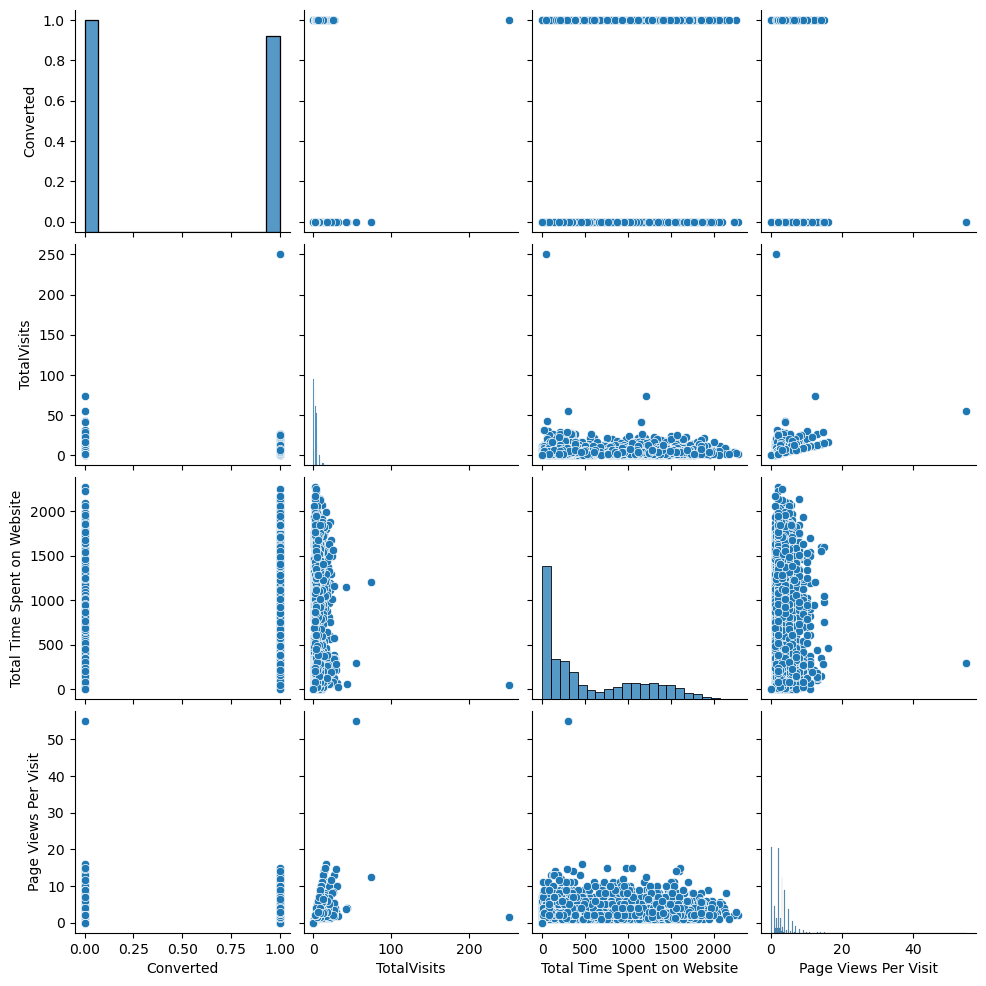

In [61]:

sns.pairplot(df)
plt.show()

<Axes: >

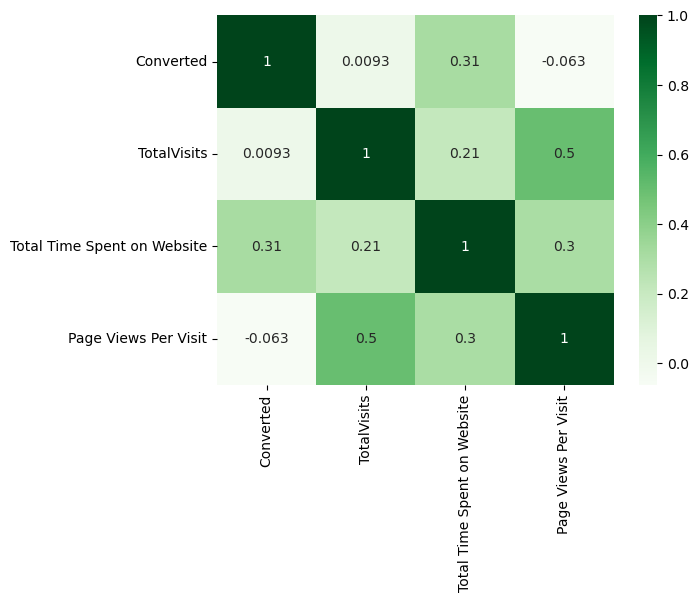

In [62]:
sns.heatmap(df.corr(), annot = True, cmap = "Greens")

The variable converted and Total time spent on webiste has a correlation of 0.31.


### Checking for outliers

In [63]:
df.describe()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6372.000000,6372.000000,6372.000000,6372.000000
mean,0.481011,3.606717,535.279190,2.479565
std,0.499678,4.852274,565.402288,2.166345
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,34.000000,1.000000
50%,0.000000,3.000000,287.000000,2.000000
75%,1.000000,5.000000,1022.250000,3.500000
max,1.000000,251.000000,2272.000000,55.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    6372 non-null   object 
 1   Lead Source                                    6372 non-null   object 
 2   Do Not Email                                   6372 non-null   object 
 3   Converted                                      6372 non-null   int64  
 4   TotalVisits                                    6372 non-null   float64
 5   Total Time Spent on Website                    6372 non-null   int64  
 6   Page Views Per Visit                           6372 non-null   float64
 7   Last Activity                                  6372 non-null   object 
 8   Specialization                                 6372 non-null   object 
 9   What is your current occupation                6372 

In [65]:
numericalcols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

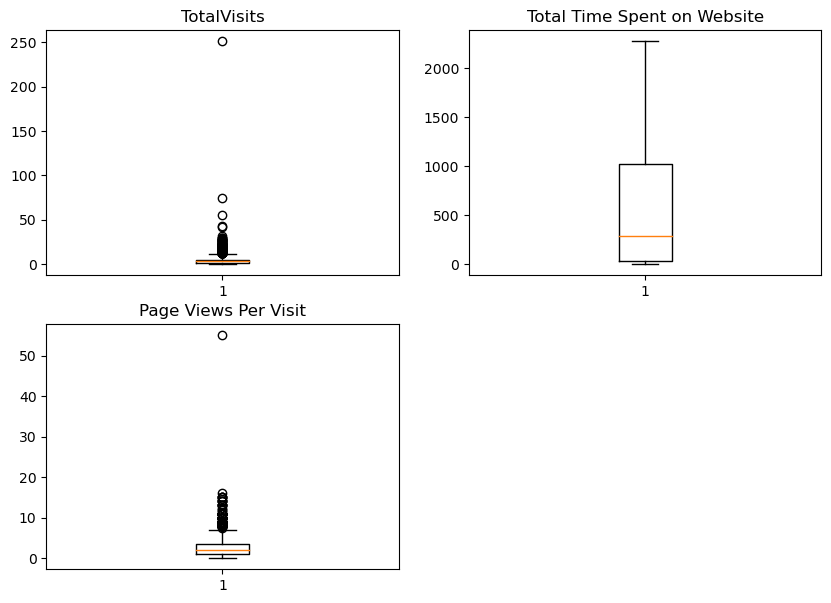

In [66]:
plt.figure(figsize=(10, 7))
for i in range(len(numericalcols)):
    plt.subplot(2,2,i+1)
    plt.title(numericalcols[i])
    plt.boxplot(x=df[numericalcols[i]])

Outliers present in TotalVisits and Page views per visit.

In [67]:
df.quantile([0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0.10,0.0,0.00,0.00,0.0
0.50,0.0,3.00,287.00,2.0
0.70,1.0,4.00,883.00,3.0
0.90,1.0,8.00,1428.90,5.0
0.95,1.0,10.00,1592.45,6.0
0.99,1.0,17.29,1849.29,9.0
1.00,1.0,251.00,2272.00,55.0


In [68]:
df

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,Modified
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Select,Unemployed,Better Career Prospects,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Better Career Prospects,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Select,Unemployed,Better Career Prospects,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,No,1,5.0,210,2.50,SMS Sent,Business Administration,Unemployed,Better Career Prospects,No,Modified
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Others,Management,Unemployed,Better Career Prospects,No,Others
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Better Career Prospects,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Better Career Prospects,Yes,SMS Sent


In [69]:
# dropping values above  99 percentile

df = df[df['TotalVisits'] < df['TotalVisits'].quantile(0.99)]

In [70]:
df = df[df['Page Views Per Visit'] < df['Page Views Per Visit'].quantile(0.99)]

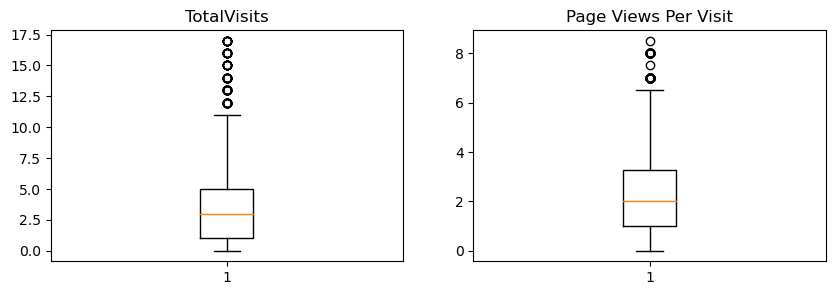

In [71]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title("TotalVisits")
plt.boxplot(df['TotalVisits'])
plt.subplot(1,2,2)
plt.title("Page Views Per Visit")
plt.boxplot(df['Page Views Per Visit'])
plt.show()


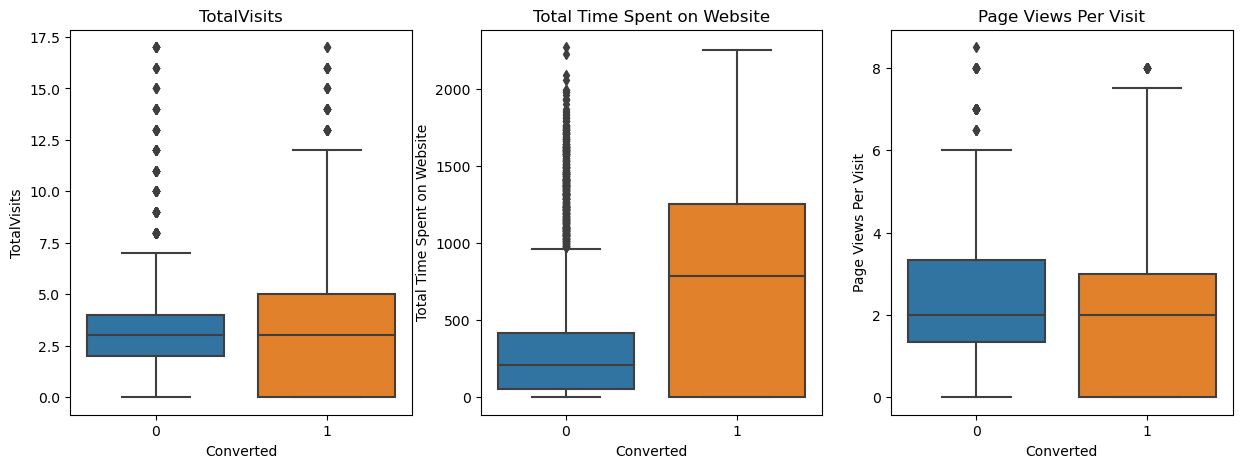

In [72]:
# Creating box plots for comparing the conversion rate in case of numerical variables

plt.figure(figsize=(15, 5))
for i in range(len(numericalcols)):
    plt.subplot(1,3,i+1)
    plt.title(numericalcols[i])
    sns.boxplot(x='Converted', y=numericalcols[i], data=df)
    

The median of number of people converted is much higher not converted in case of 'Total time spent on website'. Hence more focus should be given to people who spent more time on the website


### Data preperation

In [73]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,No,Modified


In [74]:
# Converting binary variables yes/no to 1/0 for columns Do not email and A free copy of Mastering The Interview

df['Do Not Email'] = df['Do Not Email'].map({'Yes':1, 'No':0})



In [75]:
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})

In [76]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,0,Modified


Creating dummy variables for all the categorical columns

In [77]:
df['Lead Origin'].value_counts()

Landing Page Submission    3507
API                        2112
Lead Add Form               580
Lead Import                  27
Name: Lead Origin, dtype: int64

In [78]:
# Lead Origin

leadorigin = pd.get_dummies(df['Lead Origin'], prefix = "LeadOrigin", drop_first = True)

df = pd.concat([df, leadorigin], axis = 1)

In [79]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadOrigin_Lead Import'],
      dtype='object')

In [80]:
# Lead Source

leadsrc = pd.get_dummies(df['Lead Source'], prefix = "Leadsrc")

leadsrc.drop('Leadsrc_Others', axis=1)


df = pd.concat([df, leadsrc], axis = 1)

In [81]:
# Last Activity

lastact = pd.get_dummies(df['Last Activity'], prefix = "Lastact")

lastact.drop('Lastact_Others', axis=1)


df = pd.concat([df, lastact], axis = 1)

In [82]:
# Specialization

spc = pd.get_dummies(df['Specialization'], prefix = "Specialization", drop_first = True)

df = pd.concat([df, spc], axis = 1)

In [83]:
# What is your current occupation

occp = pd.get_dummies(df['What is your current occupation'], prefix = "Occupation", drop_first = True)

df = pd.concat([df, occp], axis = 1)

In [84]:
# What is your current occupation

choose = pd.get_dummies(df['What matters most to you in choosing a course'], prefix = "What matters in choosing a course")
choose.drop('What matters in choosing a course_Other', axis=1)


df = pd.concat([df, choose], axis = 1)

In [85]:
# Last Notable Activity

lna = pd.get_dummies(df['Last Notable Activity'], prefix = "Last notable act")
lna.drop('Last notable act_Others', axis = 1)

df = pd.concat([df, lna], axis=1)

In [86]:
# Do Not Email

donotemail = pd.get_dummies(df['Do Not Email'], prefix = "Do Not Email", drop_first = True)


df = pd.concat([df, donotemail], axis=1)

In [87]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadOrigin_Lead Import', 'Leadsrc_Direct Traffic', 'Leadsrc_Google',
       'Leadsrc_Olark Chat', 'Leadsrc_Organic Search', 'Leadsrc_Others',
       'Leadsrc_Reference', 'Leadsrc_Referral Sites', 'Leadsrc_Social Media',
       'Leadsrc_Welingak Website', 'Lastact_Converted to Lead',
       'Lastact_Email Bounced', 'Lastact_Email Link Clicked',
       'Lastact_Email Opened', 'Lastact_Form Submitted on Website',
       'Lastact_Had a Phone Conversation', 'Lastact_Olark Chat Conversation',
       'Lastact_Others', 'Lastact_Page Visited on Website', 'Lastact_SMS Sent

In [88]:
# Dropping the original categorical columns
df.drop(columns = ['Do Not Email', 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'A free copy of Mastering The Interview', 'Last Notable Activity'], inplace = True)

### Test-Train Split¶

In [195]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,Leadsrc_Direct Traffic,Leadsrc_Google,Leadsrc_Olark Chat,...,Last notable act_Email Link Clicked,Last notable act_Email Opened,Last notable act_Modified,Last notable act_Olark Chat Conversation,Last notable act_Others,Last notable act_Page Visited on Website,Last notable act_SMS Sent,Last notable act_Unreachable,Last notable act_Unsubscribed,Do Not Email_1
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [196]:
# Grouping all the feature variables
X = df.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,Leadsrc_Direct Traffic,Leadsrc_Google,Leadsrc_Olark Chat,Leadsrc_Organic Search,...,Last notable act_Email Link Clicked,Last notable act_Email Opened,Last notable act_Modified,Last notable act_Olark Chat Conversation,Last notable act_Others,Last notable act_Page Visited on Website,Last notable act_SMS Sent,Last notable act_Unreachable,Last notable act_Unsubscribed,Do Not Email_1
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [197]:
# Target variable 'converted'
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [198]:
# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [199]:
X_train.head(3)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,Leadsrc_Direct Traffic,Leadsrc_Google,Leadsrc_Olark Chat,Leadsrc_Organic Search,...,Last notable act_Email Link Clicked,Last notable act_Email Opened,Last notable act_Modified,Last notable act_Olark Chat Conversation,Last notable act_Others,Last notable act_Page Visited on Website,Last notable act_SMS Sent,Last notable act_Unreachable,Last notable act_Unsubscribed,Do Not Email_1
4305,6.0,373,6.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2675,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7045,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [200]:
X_test.head(3)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,Leadsrc_Direct Traffic,Leadsrc_Google,Leadsrc_Olark Chat,Leadsrc_Organic Search,...,Last notable act_Email Link Clicked,Last notable act_Email Opened,Last notable act_Modified,Last notable act_Olark Chat Conversation,Last notable act_Others,Last notable act_Page Visited on Website,Last notable act_SMS Sent,Last notable act_Unreachable,Last notable act_Unsubscribed,Do Not Email_1
5067,5.0,171,2.50,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
5655,1.0,496,1.00,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8114,5.0,1399,1.67,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Feature Scaling

In [201]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [202]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,Leadsrc_Direct Traffic,Leadsrc_Google,Leadsrc_Olark Chat,Leadsrc_Organic Search,...,Last notable act_Email Link Clicked,Last notable act_Email Opened,Last notable act_Modified,Last notable act_Olark Chat Conversation,Last notable act_Others,Last notable act_Page Visited on Website,Last notable act_SMS Sent,Last notable act_Unreachable,Last notable act_Unsubscribed,Do Not Email_1
4305,0.352941,0.164173,0.705882,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2675,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7045,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2027,0.294118,0.453345,0.588235,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1410,0.294118,0.129401,0.588235,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


### Model building

In [204]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4305
Model Family:                Binomial   Df Model:                           52
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 06 Apr 2024   Deviance:                   1.2692e+05
Time:                        10:48:26   Pearson chi2:                 6.21e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                        4.266e+14    3.6e+07   1.18e+07      0.000    4.27e+14    4.27e+14
TotalVisits                                                  7.207e+14   8.97e+06   8.04e+07      0.000    7.21e+14    7.21e+14
Total Time Spent on Website                                  1.784e+15   4.74e+06   3.77e+08      0.000    1.78e+15    1.78e+15
Page Views Per Visit                                        -6.017e+14   7.77e+06  -7.75e+07      0.000   -6.02e+14   -6.02e+14
LeadOrigin_Landing Page Submission                           1.157e+14   3.81e+06   3.03e+07      0.000    1.16e+14    1.16e+14
LeadOrigin_Lead Add Form                                    -1.154e+15   3.05e+07  -3.78e+07      0.000   -1.15e+15   -1.15e+15
LeadOrigin_Lead Import                                       3.488e+14   4.22e+07   8.27e+06      0.000    3.49e+14    3.49e+14
Leadsrc_Direct Traffic                                      -7.653e+14   1.01e+07   -7.6e+07      0.000   -7.65e+14   -7.65e+14
Leadsrc_Google                                              -1.674e+14   9.97e+06  -1.68e+07      0.000   -1.67e+14   -1.67e+14
Leadsrc_Olark Chat                                           7.623e+14   1.02e+07   7.48e+07      0.000    7.62e+14    7.62e+14
Leadsrc_Organic Search                                      -3.479e+14   1.03e+07  -3.39e+07      0.000   -3.48e+14   -3.48e+14
Leadsrc_Others                                              -4.463e+13   2.25e+07  -1.98e+06      0.000   -4.46e+13   -4.46e+13
Leadsrc_Reference                                            1.685e+15   2.41e+07   6.99e+07      0.000    1.69e+15    1.69e+15
Leadsrc_Referral Sites                                      -9.307e+14   1.32e+07  -7.07e+07      0.000   -9.31e+14   -9.31e+14
Leadsrc_Social Media                                        -1.526e+15    3.6e+07  -4.24e+07      0.000   -1.53e+15   -1.53e+15
Leadsrc_Welingak Website                                     1.761e+15   2.48e+07   7.09e+07      0.000    1.76e+15    1.76e+15
Lastact_Converted to Lead                                   -4.106e+14   7.56e+06  -5.43e+07      0.000   -4.11e+14   -4.11e+14
Lastact_Email Bounced                                       -7.317e+14   9.78e+06  -7.48e+07      0.000   -7.32e+14   -7.32e+14
Lastact_Email Link Clicked                                   7.305e+13   1.08e+07   6.76e+06      0.000     7.3e+13     7.3e+13
Lastact_Email Opened                                         2.034e+14   7.04e+06   2.89e+07      0.000    2.03e+14    2.03e+14
Lastact_Form Submitted on Website                           -6.107e+14   1.03e+07  -5.95e+07      0.000   -6.11e+14   -6.11e+14
Lastact_Had

Feature Selection Using RFE

In [205]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [206]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 20)             
rfe = rfe.fit(X_train, y_train)

In [207]:
rfe.support_

array([ True,  True, False,  True,  True, False, False, False,  True,
       False, False,  True, False, False,  True, False,  True, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False,  True,  True,  True, False, False, False,
        True, False, False, False, False,  True, False, False,  True,
       False,  True])

In [208]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 17),
 ('Leadsrc_Direct Traffic', False, 12),
 ('Leadsrc_Google', False, 15),
 ('Leadsrc_Olark Chat', True, 1),
 ('Leadsrc_Organic Search', False, 13),
 ('Leadsrc_Others', False, 37),
 ('Leadsrc_Reference', True, 1),
 ('Leadsrc_Referral Sites', False, 14),
 ('Leadsrc_Social Media', False, 24),
 ('Leadsrc_Welingak Website', True, 1),
 ('Lastact_Converted to Lead', False, 6),
 ('Lastact_Email Bounced', True, 1),
 ('Lastact_Email Link Clicked', False, 36),
 ('Lastact_Email Opened', False, 23),
 ('Lastact_Form Submitted on Website', False, 11),
 ('Lastact_Had a Phone Conversation', True, 1),
 ('Lastact_Olark Chat Conversation', True, 1),
 ('Lastact_Others', False, 2),
 ('Lastact_Page Visited on Website', False, 9),
 ('Lastact_SMS Sent', True, 1),
 ('Lastact_Unrea

In [209]:
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'Leadsrc_Olark Chat', 'Leadsrc_Reference', 'Leadsrc_Welingak Website',
       'Lastact_Email Bounced', 'Lastact_Had a Phone Conversation',
       'Lastact_Olark Chat Conversation', 'Lastact_SMS Sent',
       'Specialization_Select', 'Occupation_Housewife', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional',
       'Last notable act_Email Bounced', 'Last notable act_Others',
       'Last notable act_Unreachable', 'Do Not Email_1'],
      dtype='object')

In [210]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'LeadOrigin_Lead Import',
       'Leadsrc_Direct Traffic', 'Leadsrc_Google', 'Leadsrc_Organic Search',
       'Leadsrc_Others', 'Leadsrc_Referral Sites', 'Leadsrc_Social Media',
       'Lastact_Converted to Lead', 'Lastact_Email Link Clicked',
       'Lastact_Email Opened', 'Lastact_Form Submitted on Website',
       'Lastact_Others', 'Lastact_Page Visited on Website',
       'Lastact_Unreachable', 'Lastact_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Occupation_Other',
       'What matters in choosing a course_Better Career Prospects',
       'What matters in choosing a course_Flexibility & Convenience',
       'What matt

In [211]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4337
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1947.6
Date:                Sat, 06 Apr 2024   Deviance:                       3895.3
Time:                        10:48:44   Pearson chi2:                 4.54e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3883
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.3377      0.736     -1.818      0.069      -2.780       0.105
TotalVisits                            1.4387      0.285      5.047      0.000       0.880       1.997
Total Time Spent on Website            4.5165      0.193     23.414      0.000       4.138       4.895
LeadOrigin_Landing Page Submission    -0.9712      0.143     -6.786      0.000      -1.252      -0.691
LeadOrigin_Lead Add Form               1.9014      1.213      1.568      0.117      -0.475       4.278
Leadsrc_Olark Chat                     1.6954      0.155     10.954      0.000       1.392       1.999
Leadsrc_Reference                      1.7605      1.232      1.430      0.153      -0.653       4.174
Leadsrc_Welingak Website               3.7408      1.411      2.652      0.008       0.976       6.505
Lastact_Email Bounced                 -1.4625      0.663     -2.206      0.027      -2.762      -0.163
Lastact_Had a Phone Conversation       2.7027      1.528      1.769      0.077      -0.293       5.698
Lastact_Olark Chat Conversation       -1.1223      0.190     -5.897      0.000      -1.495      -0.749
Lastact_SMS Sent                       1.2232      0.087     14.017      0.000       1.052       1.394
Specialization_Select                 -0.8514      0.141     -6.030      0.000      -1.128      -0.575
Occupation_Housewife                  23.8655   2.54e+04      0.001      0.999   -4.98e+04    4.99e+04
Occupation_Student                    -0.4400      0.753     -0.585      0.559      -1.915       1.035
Occupation_Unemployed                 -0.2532      0.719     -0.352      0.725      -1.663       1.157
Occupation_Working Professional        2.0750      0.742      2.796      0.005       0.621       3.529
Last notable act_Email Bounced         1.9925      0.810      2.459      0.014       0.405       3.580
Last notable act_Others               21.3154   1.89e+04      0.001      0.999    -3.7e+04    3.71e+04
Last notable act_Unreachable           2.6690      0.807      3.308      0.001       1.088       4.251
Do Not Email_1                        -1.4201      0.236     -6.008      0.000      -1.883      -0.957
======================================================================================================
"""

In [212]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [213]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,LeadOrigin_Lead Add Form,67.34
5,Leadsrc_Reference,53.90
6,Leadsrc_Welingak Website,14.69
14,Occupation_Unemployed,13.95
2,LeadOrigin_Landing Page Submission,6.84
11,Specialization_Select,3.44
0,TotalVisits,3.43
8,Lastact_Had a Phone Conversation,2.66
17,Last notable act_Others,2.66
15,Occupation_Working Professional,2.55


In [214]:
# look at significance of variables( p values) and VIF. Then proceed to drop variables according to the following steps

# We could have variables with
# - high p-values, high VIF => drop anyway
# - high p-values, low VIF => remove these first
# - low p-values, high VIF => remove after
# - low p-values, low VIF => keep

In [215]:
# Dropping Leadsrc_Reference as it has high P-value and VIF

col = col.drop('Leadsrc_Reference', 1)
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4338
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1948.4
Date:                Sat, 06 Apr 2024   Deviance:                       3896.8
Time:                        10:49:23   Pearson chi2:                 4.56e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3881
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.3361      0.736     -1.816      0.069      -2.778       0.106
TotalVisits                            1.4355      0.285      5.034      0.000       0.877       1.994
Total Time Spent on Website            4.5140      0.193     23.400      0.000       4.136       4.892
LeadOrigin_Landing Page Submission    -0.9703      0.143     -6.782      0.000      -1.251      -0.690
LeadOrigin_Lead Add Form               3.6186      0.265     13.679      0.000       3.100       4.137
Leadsrc_Olark Chat                     1.6919      0.155     10.925      0.000       1.388       1.995
Leadsrc_Welingak Website               2.0203      0.761      2.656      0.008       0.529       3.511
Lastact_Email Bounced                 -1.4656      0.663     -2.211      0.027      -2.765      -0.167
Lastact_Had a Phone Conversation       2.6993      1.528      1.767      0.077      -0.295       5.693
Lastact_Olark Chat Conversation       -1.1219      0.190     -5.896      0.000      -1.495      -0.749
Lastact_SMS Sent                       1.2229      0.087     14.018      0.000       1.052       1.394
Specialization_Select                 -0.8491      0.141     -6.017      0.000      -1.126      -0.573
Occupation_Housewife                  23.8663   2.55e+04      0.001      0.999   -4.99e+04    4.99e+04
Occupation_Student                    -0.4383      0.752     -0.582      0.560      -1.913       1.037
Occupation_Unemployed                 -0.2542      0.719     -0.353      0.724      -1.664       1.156
Occupation_Working Professional        2.0753      0.742      2.797      0.005       0.621       3.530
Last notable act_Email Bounced         1.9914      0.810      2.458      0.014       0.404       3.579
Last notable act_Others               21.3280   1.89e+04      0.001      0.999    -3.7e+04    3.71e+04
Last notable act_Unreachable           2.6691      0.807      3.308      0.001       1.088       4.250
Do Not Email_1                        -1.4158      0.236     -6.000      0.000      -1.878      -0.953
======================================================================================================
"""

In [216]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Occupation_Unemployed,13.92
2,LeadOrigin_Landing Page Submission,6.84
10,Specialization_Select,3.44
0,TotalVisits,3.42
16,Last notable act_Others,2.66
7,Lastact_Had a Phone Conversation,2.66
14,Occupation_Working Professional,2.54
1,Total Time Spent on Website,2.47
3,LeadOrigin_Lead Add Form,2.27
4,Leadsrc_Olark Chat,2.15


In [217]:
# Dropping Occupation_Housewife as it has high P-value

col = col.drop('Occupation_Housewife', 1)
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4339
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1952.3
Date:                Sat, 06 Apr 2024   Deviance:                       3904.5
Time:                        10:49:35   Pearson chi2:                 4.56e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3870
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.2040      0.658     -0.310      0.756      -1.493       1.085
TotalVisits                            1.4000      0.285      4.917      0.000       0.842       1.958
Total Time Spent on Website            4.5051      0.193     23.382      0.000       4.127       4.883
LeadOrigin_Landing Page Submission    -0.9623      0.143     -6.729      0.000      -1.243      -0.682
LeadOrigin_Lead Add Form               3.6134      0.264     13.664      0.000       3.095       4.132
Leadsrc_Olark Chat                     1.6845      0.155     10.889      0.000       1.381       1.988
Leadsrc_Welingak Website               2.0173      0.761      2.652      0.008       0.526       3.508
Lastact_Email Bounced                 -1.4684      0.663     -2.216      0.027      -2.767      -0.170
Lastact_Had a Phone Conversation       2.6931      1.526      1.765      0.078      -0.298       5.684
Lastact_Olark Chat Conversation       -1.1210      0.190     -5.894      0.000      -1.494      -0.748
Lastact_SMS Sent                       1.2211      0.087     14.005      0.000       1.050       1.392
Specialization_Select                 -0.8458      0.141     -5.996      0.000      -1.122      -0.569
Occupation_Student                    -1.5651      0.677     -2.311      0.021      -2.892      -0.238
Occupation_Unemployed                 -1.3806      0.640     -2.156      0.031      -2.636      -0.125
Occupation_Working Professional        0.9477      0.665      1.424      0.154      -0.356       2.252
Last notable act_Email Bounced         1.9925      0.810      2.460      0.014       0.405       3.580
Last notable act_Others               20.3310   1.15e+04      0.002      0.999   -2.25e+04    2.25e+04
Last notable act_Unreachable           2.6674      0.807      3.307      0.001       1.087       4.248
Do Not Email_1                        -1.4152      0.236     -6.001      0.000      -1.877      -0.953
======================================================================================================
"""

In [218]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Occupation_Unemployed,13.68
2,LeadOrigin_Landing Page Submission,6.75
0,TotalVisits,3.42
10,Specialization_Select,3.41
15,Last notable act_Others,2.66
7,Lastact_Had a Phone Conversation,2.66
13,Occupation_Working Professional,2.51
1,Total Time Spent on Website,2.46
3,LeadOrigin_Lead Add Form,2.25
4,Leadsrc_Olark Chat,2.14


In [219]:
# Dropping Lastact_Had a Phone Conversation as it has high P-value

col = col.drop('Lastact_Had a Phone Conversation', 1)
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4340
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1953.9
Date:                Sat, 06 Apr 2024   Deviance:                       3907.9
Time:                        10:49:50   Pearson chi2:                 4.56e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3865
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.1982      0.658     -0.301      0.763      -1.487       1.091
TotalVisits                            1.3889      0.285      4.881      0.000       0.831       1.947
Total Time Spent on Website            4.5031      0.193     23.390      0.000       4.126       4.880
LeadOrigin_Landing Page Submission    -0.9641      0.143     -6.743      0.000      -1.244      -0.684
LeadOrigin_Lead Add Form               3.6036      0.264     13.635      0.000       3.086       4.122
Leadsrc_Olark Chat                     1.6750      0.154     10.843      0.000       1.372       1.978
Leadsrc_Welingak Website               2.0146      0.761      2.648      0.008       0.524       3.506
Lastact_Email Bounced                 -1.4834      0.663     -2.239      0.025      -2.782      -0.185
Lastact_Olark Chat Conversation       -1.1250      0.190     -5.917      0.000      -1.498      -0.752
Lastact_SMS Sent                       1.2165      0.087     13.963      0.000       1.046       1.387
Specialization_Select                 -0.8406      0.141     -5.963      0.000      -1.117      -0.564
Occupation_Student                    -1.5650      0.677     -2.311      0.021      -2.892      -0.238
Occupation_Unemployed                 -1.3788      0.640     -2.153      0.031      -2.634      -0.124
Occupation_Working Professional        0.9539      0.665      1.434      0.152      -0.350       2.258
Last notable act_Email Bounced         1.9886      0.810      2.456      0.014       0.402       3.576
Last notable act_Others               22.7475   1.17e+04      0.002      0.998   -2.29e+04    2.29e+04
Last notable act_Unreachable           2.6635      0.807      3.302      0.001       1.083       4.244
Do Not Email_1                        -1.4008      0.236     -5.940      0.000      -1.863      -0.939
======================================================================================================
"""

In [220]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Occupation_Unemployed,13.68
2,LeadOrigin_Landing Page Submission,6.75
0,TotalVisits,3.42
9,Specialization_Select,3.41
12,Occupation_Working Professional,2.51
1,Total Time Spent on Website,2.46
3,LeadOrigin_Lead Add Form,2.25
4,Leadsrc_Olark Chat,2.14
6,Lastact_Email Bounced,2.04
16,Do Not Email_1,1.72


In [221]:
# Dropping Last notable act_Others as it has high P-value

col = col.drop('Last notable act_Others', 1)
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4341
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1961.6
Date:                Sat, 06 Apr 2024   Deviance:                       3923.3
Time:                        10:49:59   Pearson chi2:                 4.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3844
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.1952      0.657     -0.297      0.767      -1.484       1.093
TotalVisits                            1.3826      0.284      4.868      0.000       0.826       1.939
Total Time Spent on Website            4.4902      0.192     23.387      0.000       4.114       4.867
LeadOrigin_Landing Page Submission    -0.9605      0.143     -6.731      0.000      -1.240      -0.681
LeadOrigin_Lead Add Form               3.6120      0.265     13.656      0.000       3.094       4.130
Leadsrc_Olark Chat                     1.6684      0.154     10.818      0.000       1.366       1.971
Leadsrc_Welingak Website               1.9985      0.761      2.627      0.009       0.508       3.489
Lastact_Email Bounced                 -1.5048      0.662     -2.272      0.023      -2.803      -0.207
Lastact_Olark Chat Conversation       -1.1307      0.190     -5.949      0.000      -1.503      -0.758
Lastact_SMS Sent                       1.2040      0.087     13.850      0.000       1.034       1.374
Specialization_Select                 -0.8453      0.141     -6.005      0.000      -1.121      -0.569
Occupation_Student                    -1.5603      0.677     -2.305      0.021      -2.887      -0.234
Occupation_Unemployed                 -1.3660      0.640     -2.134      0.033      -2.620      -0.112
Occupation_Working Professional        0.9639      0.665      1.449      0.147      -0.339       2.267
Last notable act_Email Bounced         1.9866      0.809      2.454      0.014       0.400       3.573
Last notable act_Unreachable           2.6499      0.806      3.286      0.001       1.069       4.230
Do Not Email_1                        -1.3863      0.234     -5.927      0.000      -1.845      -0.928
======================================================================================================
"""

In [222]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Occupation_Unemployed,13.67
2,LeadOrigin_Landing Page Submission,6.75
0,TotalVisits,3.42
9,Specialization_Select,3.41
12,Occupation_Working Professional,2.50
1,Total Time Spent on Website,2.46
3,LeadOrigin_Lead Add Form,2.25
4,Leadsrc_Olark Chat,2.14
6,Lastact_Email Bounced,2.04
15,Do Not Email_1,1.72


In [223]:
# Dropping Occupation_Working Professional as it has high P-value

col = col.drop('Occupation_Working Professional', 1)
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4342
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1962.6
Date:                Sat, 06 Apr 2024   Deviance:                       3925.2
Time:                        10:50:12   Pearson chi2:                 4.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3841
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.7092      0.230      3.083      0.002       0.258       1.160
TotalVisits                            1.3728      0.284      4.832      0.000       0.816       1.930
Total Time Spent on Website            4.4887      0.192     23.382      0.000       4.112       4.865
LeadOrigin_Landing Page Submission    -0.9630      0.143     -6.749      0.000      -1.243      -0.683
LeadOrigin_Lead Add Form               3.6103      0.264     13.654      0.000       3.092       4.129
Leadsrc_Olark Chat                     1.6666      0.154     10.813      0.000       1.365       1.969
Leadsrc_Welingak Website               1.9968      0.761      2.625      0.009       0.506       3.488
Lastact_Email Bounced                 -1.4929      0.660     -2.262      0.024      -2.787      -0.199
Lastact_Olark Chat Conversation       -1.1273      0.190     -5.939      0.000      -1.499      -0.755
Lastact_SMS Sent                       1.2078      0.087     13.910      0.000       1.038       1.378
Specialization_Select                 -0.8475      0.141     -6.023      0.000      -1.123      -0.572
Occupation_Student                    -2.4610      0.288     -8.544      0.000      -3.026      -1.896
Occupation_Unemployed                 -2.2671      0.185    -12.277      0.000      -2.629      -1.905
Last notable act_Email Bounced         1.9804      0.807      2.453      0.014       0.398       3.563
Last notable act_Unreachable           2.6514      0.806      3.288      0.001       1.071       4.232
Do Not Email_1                        -1.3848      0.234     -5.926      0.000      -1.843      -0.927
======================================================================================================
"""

In [224]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Occupation_Unemployed,6.82
2,LeadOrigin_Landing Page Submission,4.89
0,TotalVisits,3.08
9,Specialization_Select,2.95
1,Total Time Spent on Website,2.22
6,Lastact_Email Bounced,2.04
4,Leadsrc_Olark Chat,1.75
14,Do Not Email_1,1.72
8,Lastact_SMS Sent,1.63
3,LeadOrigin_Lead Add Form,1.52


In [225]:
# Dropping Lastact_Email Bounced as it has high P-value

col = col.drop('Lastact_Email Bounced', 1)
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4343
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1966.0
Date:                Sat, 06 Apr 2024   Deviance:                       3932.0
Time:                        10:50:20   Pearson chi2:                 4.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3831
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.6844      0.229      2.985      0.003       0.235       1.134
TotalVisits                            1.4080      0.284      4.958      0.000       0.851       1.965
Total Time Spent on Website            4.4881      0.192     23.397      0.000       4.112       4.864
LeadOrigin_Landing Page Submission    -0.9689      0.143     -6.798      0.000      -1.248      -0.690
LeadOrigin_Lead Add Form               3.6421      0.265     13.748      0.000       3.123       4.161
Leadsrc_Olark Chat                     1.6635      0.154     10.802      0.000       1.362       1.965
Leadsrc_Welingak Website               2.0093      0.761      2.639      0.008       0.517       3.501
Lastact_Olark Chat Conversation       -1.1104      0.190     -5.851      0.000      -1.482      -0.738
Lastact_SMS Sent                       1.2330      0.086     14.272      0.000       1.064       1.402
Specialization_Select                 -0.8512      0.141     -6.055      0.000      -1.127      -0.576
Occupation_Student                    -2.4439      0.288     -8.491      0.000      -3.008      -1.880
Occupation_Unemployed                 -2.2564      0.184    -12.270      0.000      -2.617      -1.896
Last notable act_Email Bounced         0.7268      0.545      1.334      0.182      -0.341       1.795
Last notable act_Unreachable           2.6618      0.806      3.301      0.001       1.081       4.242
Do Not Email_1                        -1.6098      0.217     -7.422      0.000      -2.035      -1.185
======================================================================================================
"""

In [226]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Occupation_Unemployed,6.82
2,LeadOrigin_Landing Page Submission,4.87
0,TotalVisits,3.07
8,Specialization_Select,2.95
1,Total Time Spent on Website,2.22
4,Leadsrc_Olark Chat,1.75
7,Lastact_SMS Sent,1.60
3,LeadOrigin_Lead Add Form,1.51
5,Leadsrc_Welingak Website,1.31
6,Lastact_Olark Chat Conversation,1.27


In [227]:
# Dropping Last notable act_Email Bounced as it has high P-value

col = col.drop('Last notable act_Email Bounced', 1)
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4344
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1966.8
Date:                Sat, 06 Apr 2024   Deviance:                       3933.7
Time:                        10:50:29   Pearson chi2:                 4.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3829
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.6916      0.229      3.015      0.003       0.242       1.141
TotalVisits                            1.4049      0.284      4.949      0.000       0.849       1.961
Total Time Spent on Website            4.4881      0.192     23.406      0.000       4.112       4.864
LeadOrigin_Landing Page Submission    -0.9689      0.143     -6.793      0.000      -1.248      -0.689
LeadOrigin_Lead Add Form               3.6293      0.264     13.730      0.000       3.111       4.147
Leadsrc_Olark Chat                     1.6642      0.154     10.808      0.000       1.362       1.966
Leadsrc_Welingak Website               2.0355      0.763      2.668      0.008       0.540       3.531
Lastact_Olark Chat Conversation       -1.1172      0.190     -5.891      0.000      -1.489      -0.746
Lastact_SMS Sent                       1.2238      0.086     14.229      0.000       1.055       1.392
Specialization_Select                 -0.8467      0.141     -6.023      0.000      -1.122      -0.571
Occupation_Student                    -2.4503      0.288     -8.514      0.000      -3.014      -1.886
Occupation_Unemployed                 -2.2608      0.184    -12.277      0.000      -2.622      -1.900
Last notable act_Unreachable           2.6591      0.806      3.297      0.001       1.079       4.240
Do Not Email_1                        -1.5123      0.201     -7.531      0.000      -1.906      -1.119
======================================================================================================
"""

In [228]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Occupation_Unemployed,6.82
2,LeadOrigin_Landing Page Submission,4.87
0,TotalVisits,3.06
8,Specialization_Select,2.94
1,Total Time Spent on Website,2.22
4,Leadsrc_Olark Chat,1.75
7,Lastact_SMS Sent,1.59
3,LeadOrigin_Lead Add Form,1.51
5,Leadsrc_Welingak Website,1.31
6,Lastact_Olark Chat Conversation,1.27


In [229]:
# Dropping Specialization_Select 

col = col.drop('Specialization_Select', 1)
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4345
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1985.4
Date:                Sat, 06 Apr 2024   Deviance:                       3970.9
Time:                        10:50:40   Pearson chi2:                 4.53e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3776
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1861      0.210      0.887      0.375      -0.225       0.597
TotalVisits                            1.5512      0.281      5.515      0.000       1.000       2.103
Total Time Spent on Website            4.5623      0.191     23.869      0.000       4.188       4.937
LeadOrigin_Landing Page Submission    -0.3904      0.103     -3.798      0.000      -0.592      -0.189
LeadOrigin_Lead Add Form               3.9339      0.260     15.145      0.000       3.425       4.443
Leadsrc_Olark Chat                     1.6476      0.151     10.913      0.000       1.352       1.943
Leadsrc_Welingak Website               1.5994      0.759      2.108      0.035       0.112       3.087
Lastact_Olark Chat Conversation       -1.1731      0.186     -6.313      0.000      -1.537      -0.809
Lastact_SMS Sent                       1.2038      0.086     14.062      0.000       1.036       1.372
Occupation_Student                    -2.5876      0.283     -9.148      0.000      -3.142      -2.033
Occupation_Unemployed                 -2.4083      0.181    -13.280      0.000      -2.764      -2.053
Last notable act_Unreachable           2.7486      0.806      3.411      0.001       1.169       4.328
Do Not Email_1                        -1.5026      0.199     -7.537      0.000      -1.893      -1.112
======================================================================================================
"""

In [230]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Occupation_Unemployed,4.54
2,LeadOrigin_Landing Page Submission,3.33
0,TotalVisits,3.06
1,Total Time Spent on Website,2.22
4,Leadsrc_Olark Chat,1.69
7,Lastact_SMS Sent,1.57
3,LeadOrigin_Lead Add Form,1.50
5,Leadsrc_Welingak Website,1.27
6,Lastact_Olark Chat Conversation,1.24
8,Occupation_Student,1.14


P values are low and all VIF's are below 5.

### Model evaluation

In [231]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4305    0.471954
2675    0.995149
7045    0.989174
2027    0.818485
1410    0.172792
3764    0.564278
6720    0.172471
859     0.577524
4774    0.360169
3342    0.400129
dtype: float64

In [232]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47195373, 0.99514929, 0.98917353, 0.81848477, 0.17279229,
       0.56427798, 0.17247123, 0.57752352, 0.36016933, 0.4001291 ])

In [233]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.471954,4305
1,1,0.995149,2675
2,1,0.989174,7045
3,1,0.818485,2027
4,0,0.172792,1410


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [234]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.471954,4305,0
1,1,0.995149,2675,1
2,1,0.989174,7045,1
3,1,0.818485,2027,1
4,0,0.172792,1410,0


Confusion matrix

In [235]:
from sklearn import metrics

In [236]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1865  381]
 [ 539 1573]]


In [237]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7888939880679211


Sensitivity, Specifity and other matrices

In [238]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [239]:
# Sensitivity of the model
TP / float(TP+FN)

0.7447916666666666

In [240]:
# Specificity of the model
TN / float(TN+FP)

0.8303650934995548

In [241]:
# False postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16963490650044524


In [242]:
# positive predictive value 
print (TP / float(TP+FP))

0.8050153531218014


In [243]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7757903494176372


### Finding Optimal Cutoff Point


Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, we need to optimise the threshold. Hence, plotting an ROC curve to see what AUC we get.

In [244]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [245]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

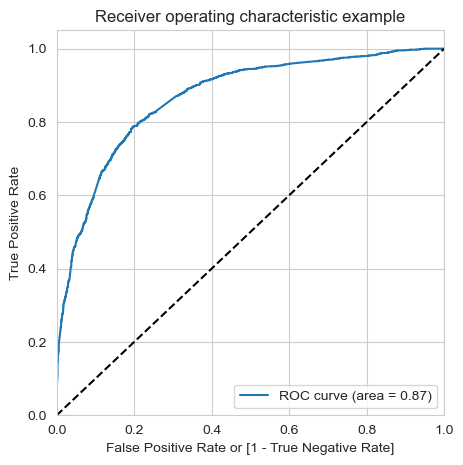

In [246]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The area under the curve of the ROC is 0.87 which is good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [247]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.471954,4305,0,1,1,1,1,1,0,0,0,0,0
1,1,0.995149,2675,1,1,1,1,1,1,1,1,1,1,1
2,1,0.989174,7045,1,1,1,1,1,1,1,1,1,1,1
3,1,0.818485,2027,1,1,1,1,1,1,1,1,1,1,0
4,0,0.172792,1410,0,1,1,0,0,0,0,0,0,0,0


In [248]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.484626  1.000000  0.000000
0.1   0.1  0.554383  0.988636  0.146037
0.2   0.2  0.728086  0.941288  0.527605
0.3   0.3  0.763653  0.901989  0.633571
0.4   0.4  0.789353  0.811553  0.768477
0.5   0.5  0.788894  0.744792  0.830365
0.6   0.6  0.779027  0.682292  0.869991
0.7   0.7  0.744608  0.561080  0.917186
0.8   0.8  0.718219  0.471117  0.950579
0.9   0.9  0.649151  0.294508  0.982636


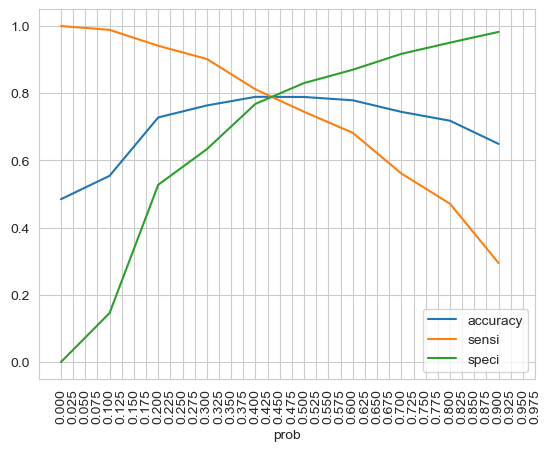

In [249]:
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step = 0.025), size=10)
plt.xticks(rotation = 90)
plt.yticks(size=10)
plt.show()

From the curve above, 0.425 is the optimum point to take it as a cutoff probability.

In [250]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.425 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.471954,4305,0,1,1,1,1,1,0,0,0,0,0,1
1,1,0.995149,2675,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.989174,7045,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.818485,2027,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.172792,1410,0,1,1,0,0,0,0,0,0,0,0,0


In [251]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100, 2))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.471954,4305,0,1,1,1,1,1,0,0,0,0,0,1,47.20
1,1,0.995149,2675,1,1,1,1,1,1,1,1,1,1,1,1,99.51
2,1,0.989174,7045,1,1,1,1,1,1,1,1,1,1,1,1,98.92
3,1,0.818485,2027,1,1,1,1,1,1,1,1,1,1,0,1,81.85
4,0,0.172792,1410,0,1,1,0,0,0,0,0,0,0,0,0,17.28


In [252]:
# overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7925653969710876

In [253]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1767,  479],
       [ 425, 1687]], dtype=int64)

In [254]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [255]:
# Sensitivity
TP / float(TP+FN)

0.7987689393939394

In [256]:
# Specificity

TN / float(TN+FP)

0.7867319679430098

In [257]:
# false postive rate
print(FP/ float(TN+FP))

0.21326803205699021


In [258]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7788550323176362


In [259]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8061131386861314


Precision and recall

In [260]:
from sklearn.metrics import precision_score, recall_score

In [261]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8050153531218014

In [262]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7447916666666666

### Making predictions on the test set

In [263]:
X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadOrigin_Lead Import', 'Leadsrc_Direct Traffic', 'Leadsrc_Google',
       'Leadsrc_Olark Chat', 'Leadsrc_Organic Search', 'Leadsrc_Others',
       'Leadsrc_Reference', 'Leadsrc_Referral Sites', 'Leadsrc_Social Media',
       'Leadsrc_Welingak Website', 'Lastact_Converted to Lead',
       'Lastact_Email Bounced', 'Lastact_Email Link Clicked',
       'Lastact_Email Opened', 'Lastact_Form Submitted on Website',
       'Lastact_Had a Phone Conversation', 'Lastact_Olark Chat Conversation',
       'Lastact_Others', 'Lastact_Page Visited on Website', 'Lastact_SMS Sent',
       'Lastact_Unreachable', 'Lastact_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management', 'Specialization_Media and

In [265]:
num_cols = X_test.select_dtypes(include=['float64', 'int64']).columns


In [269]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [270]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,Leadsrc_Olark Chat,Leadsrc_Welingak Website,Lastact_Olark Chat Conversation,Lastact_SMS Sent,Occupation_Student,Occupation_Unemployed,Last notable act_Unreachable,Do Not Email_1
5067,0.294118,0.075264,1,0,0,0,0,0,0,1,0,0
5655,0.058824,0.218310,1,0,0,0,0,0,1,0,0,0
8114,0.294118,0.615757,1,0,0,0,0,0,0,1,0,0
1931,0.000000,0.000000,0,0,1,0,0,1,0,1,0,0
3325,0.000000,0.000000,0,1,0,0,0,1,0,1,0,0


In [271]:
X_test_sm = sm.add_constant(X_test)

In [272]:
y_test_pred = res.predict((X_test_sm))

In [273]:
y_test_pred[:10]

5067    0.140281
5655    0.153858
8114    0.657671
1931    0.652297
3325    0.948608
6755    0.934572
6837    0.133897
930     0.214730
6636    0.776487
1788    0.862113
dtype: float64

In [274]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [275]:
y_pred_1.head()

,0
5067,0.140281
5655,0.153858
8114,0.657671
1931,0.652297
3325,0.948608


In [276]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [277]:

y_test_df['Prospect ID'] = y_test_df.index
y_test_df.head()

,Converted,Prospect ID
5067,0,5067
5655,1,5655
8114,0,8114
1931,1,1931
3325,1,3325


In [278]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [279]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [280]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,5067,0.140281
1,1,5655,0.153858
2,0,8114,0.657671
3,1,1931,0.652297
4,1,3325,0.948608


In [281]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [282]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]

In [283]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100, 2))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score
0,5067,0,0.140281,14.03
1,5655,1,0.153858,15.39
2,8114,0,0.657671,65.77
3,1931,1,0.652297,65.23
4,3325,1,0.948608,94.86


In [284]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.425 else 0)

In [285]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score,final_predicted
0,5067,0,0.140281,14.03,0
1,5655,1,0.153858,15.39,0
2,8114,0,0.657671,65.77,1
3,1931,1,0.652297,65.23,1
4,3325,1,0.948608,94.86,1


In [286]:
#overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7858672376873662

In [287]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[782, 205],
       [195, 686]], dtype=int64)

In [288]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [289]:
#sensitivity
TP / float(TP+FN)

0.7987689393939394

In [290]:
# specificity
TN / float(TN+FP)

0.7867319679430098

In [291]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7699214365881033

In [292]:
precision = confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])
precision

0.7699214365881033

In [293]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7786606129398411

In [294]:
recall = confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])
recall

0.7786606129398411

In [295]:
F1 = 2*(precision*recall)/(precision+recall)

In [296]:
F1

0.7742663656884875

#### The various metrics indicates that the model can predict the convertion of leads.



#### Top 3 variables which contribute most towards the probability of a lead getting converted.

In [310]:
res.params

const                                 0.186066
TotalVisits                           1.551192
Total Time Spent on Website           4.562298
LeadOrigin_Landing Page Submission   -0.390374
LeadOrigin_Lead Add Form              3.933921
Leadsrc_Olark Chat                    1.647563
Leadsrc_Welingak Website              1.599368
Lastact_Olark Chat Conversation      -1.173115
Lastact_SMS Sent                      1.203780
Occupation_Student                   -2.587594
Occupation_Unemployed                -2.408259
Last notable act_Unreachable          2.748619
Do Not Email_1                       -1.502596
dtype: float64

The variables Total Time Spent on Website is an important factor followed by LeadOrigin_Lead Add Form, Occupation_Student and 
Occupation_Unemployed